# 2019 뉴욕 맨하탄 에어비앤비 데이터 탐색

지금으로부터 1년 반 정도 전에, 미국에서 교환학생 생활을 보내고 있던 저는, 뉴욕 여행을 가기 위해 에어비앤비와 한인민박을 열심히 찾아보았었는데요. 캘리포니아, 플로리다 등 여러 지역을 여행다녀 보았지만, 그 어떤 지역보다 뉴욕 숙소비가 독보적이었던 기억이 납니다. 그 때는 한인민박을 결국 골랐지만, 나중에 또 언젠간 뉴욕 여행을 가는 것을 꿈★꾸면서 맨하탄 에어비앤비 정보를 미리 한번 정복해볼려고 합니다!! 

마침 캐글에서 [2019 뉴욕 에어비앤비 데이터](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data)를 발견했고, 저는 이 데이터에서 맨하탄 지역만 분석해보았습니다~! 궁금하지 않나요? 맨하탄 에어비앤비 가격 분포는 어느정도 되는지, 맨하탄에서 가장 잘나가는 집은 어떤 집일지, 맨하탄 내에서 인기 많은 지역은 또 어느 곳인지 등등..!!! 그 중에서도 저는 다음의 세가지 궁금증이 있었는데요. **(1)맨하탄에서 위치별로 가격이 어떻게 다를까?, (2)맨하탄에서 에어비앤비를 가장 많이 보유한 호스트는 누구일까?, (3)맨하탄에서 가장 인기가 많은 에어비앤비는 어떤 곳일까?** 입니다! 이 데이터가 변수가 많은 편은 아니었어서, 추가로 더 있었으면 하는 변수들도 있었지만, 그래도 저의 궁금증들을 얼추 해소할 수 있었습니다. 이제 시작하겠습니다!

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
data.shape

(48895, 16)

일단 변수 중에는 **에어비앤비 이름(name), 호스트 이름(host_name), 뉴욕시 내 지역(neighbourhood_group), 각 지역 내 동네(neighbourhood), 위도, 경도, 방 유형(room_type), 가격(price), 최소숙박 날짜(minimum_nights), 리뷰 개수(number_of_reviews), 1년 중 가능한 날짜(availiabiliy_365)** 등이 있습니다! 분석을 시작하기 앞서, 저는 뉴욕시에서 맨하탄 지역만 볼 거기 때문에, 맨하탄 지역만 필터링 하겠습니다. 그리고 1년중 가능한 날짜가 아예 0인 집들도 있어서, 그 집들도 일단 없애고 시작하겠습니다!  

In [3]:
data = data[(data.neighbourhood_group=='Manhattan') & (data.availability_365!=0)]
data.shape

(13559, 16)

## 1. 주요 변수들 분포

먼저 주요 변수들의 분포는 한번 알아보고 시작해야겠죠? 아래는 **가격** 변수와 **방 구조** 변수입니다. 가격을 보면 가격이 대부분 몇백달러 정도 이하인데, 만 달러까지 하는 에어비앤비가 존재하네요! 그 집때문에 지금 분포가 너무 안예쁘게 생겼습니다. 한편, 방 구조를 보면, 방 구조는 딱 3가지로 나와있고, (1)전체 집, (2)혼자 쓰는 방, (3)같이 쓰는 방 이렇게 세가지밖에 없네요. 개인적으로 조금 더 그 집 규모에 대해서 설명해주는 변수가 있었으면 합니당. 이를테면 전체 집같은 경우는 Studio형태인지, 방이 몇개인지 등에 대한 정보, 같이 쓰는 방의 경우는 2인실인지 4인실인지 등 규모에 대한 정보도 제공되면 좋을 것 같아요. 아무튼간에 이 데이터에서는 전체 집을 빌리는 것이 62%로 대다수를 차지했고, 방을 공유하는 것은 2.5%밖에 되지 않습니다. 사실 에어비앤비에서 방을 같이 쓰는 걸 찾는 사람은 거의 못본 것 같아요! 그러려면 보통 호스텔을 이용하겠죵

<IPython.core.display.Javascript object>


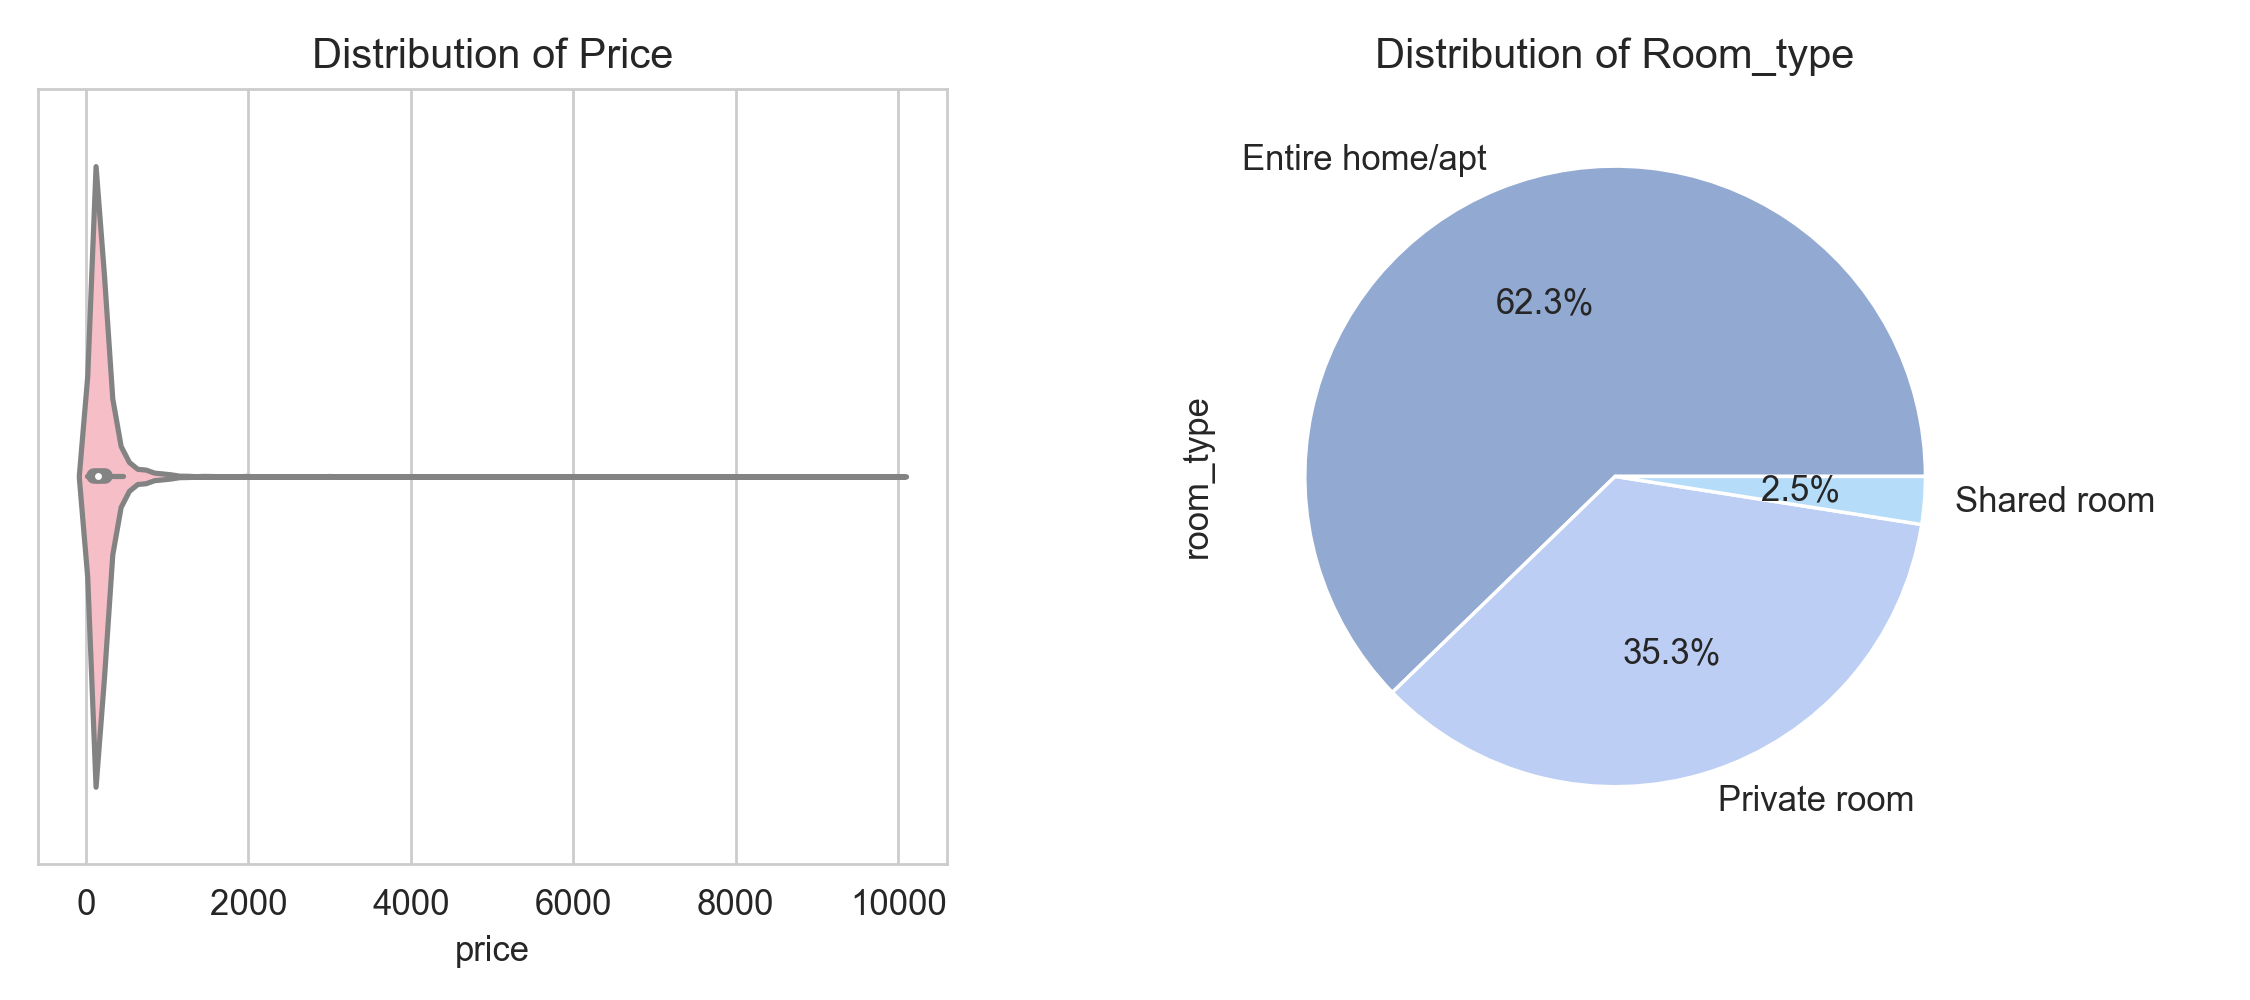

In [4]:
#가격
fig,ax=plt.subplots(1,2,figsize=(9,4))
sns.violinplot(data.price, color='lightpink',ax=ax[0])
ax[0].set_title('Distribution of Price')

#방구조
color = ['#92a9d1', '#bccef4', '#b5dcf9']
data['room_type'].value_counts().plot.pie(autopct='%1.1f%%', cmap=ListedColormap(color), ax=ax[1])
ax[1].set_title('Distribution of Room_type')

plt.tight_layout(w_pad=5)

이제 **동네** 변수를 알아봅시다. 에어비앤비를 가장 많이 보유한 동네일수록 차지하는 면적이 크게 했는데요. **Harlem** 지역이 가장 많고, 그 외에 **Midtown, East Village** 등 여행객에게 인기많은 동네들도 역시 에어비앤비가 많습니다.

<IPython.core.display.Javascript object>


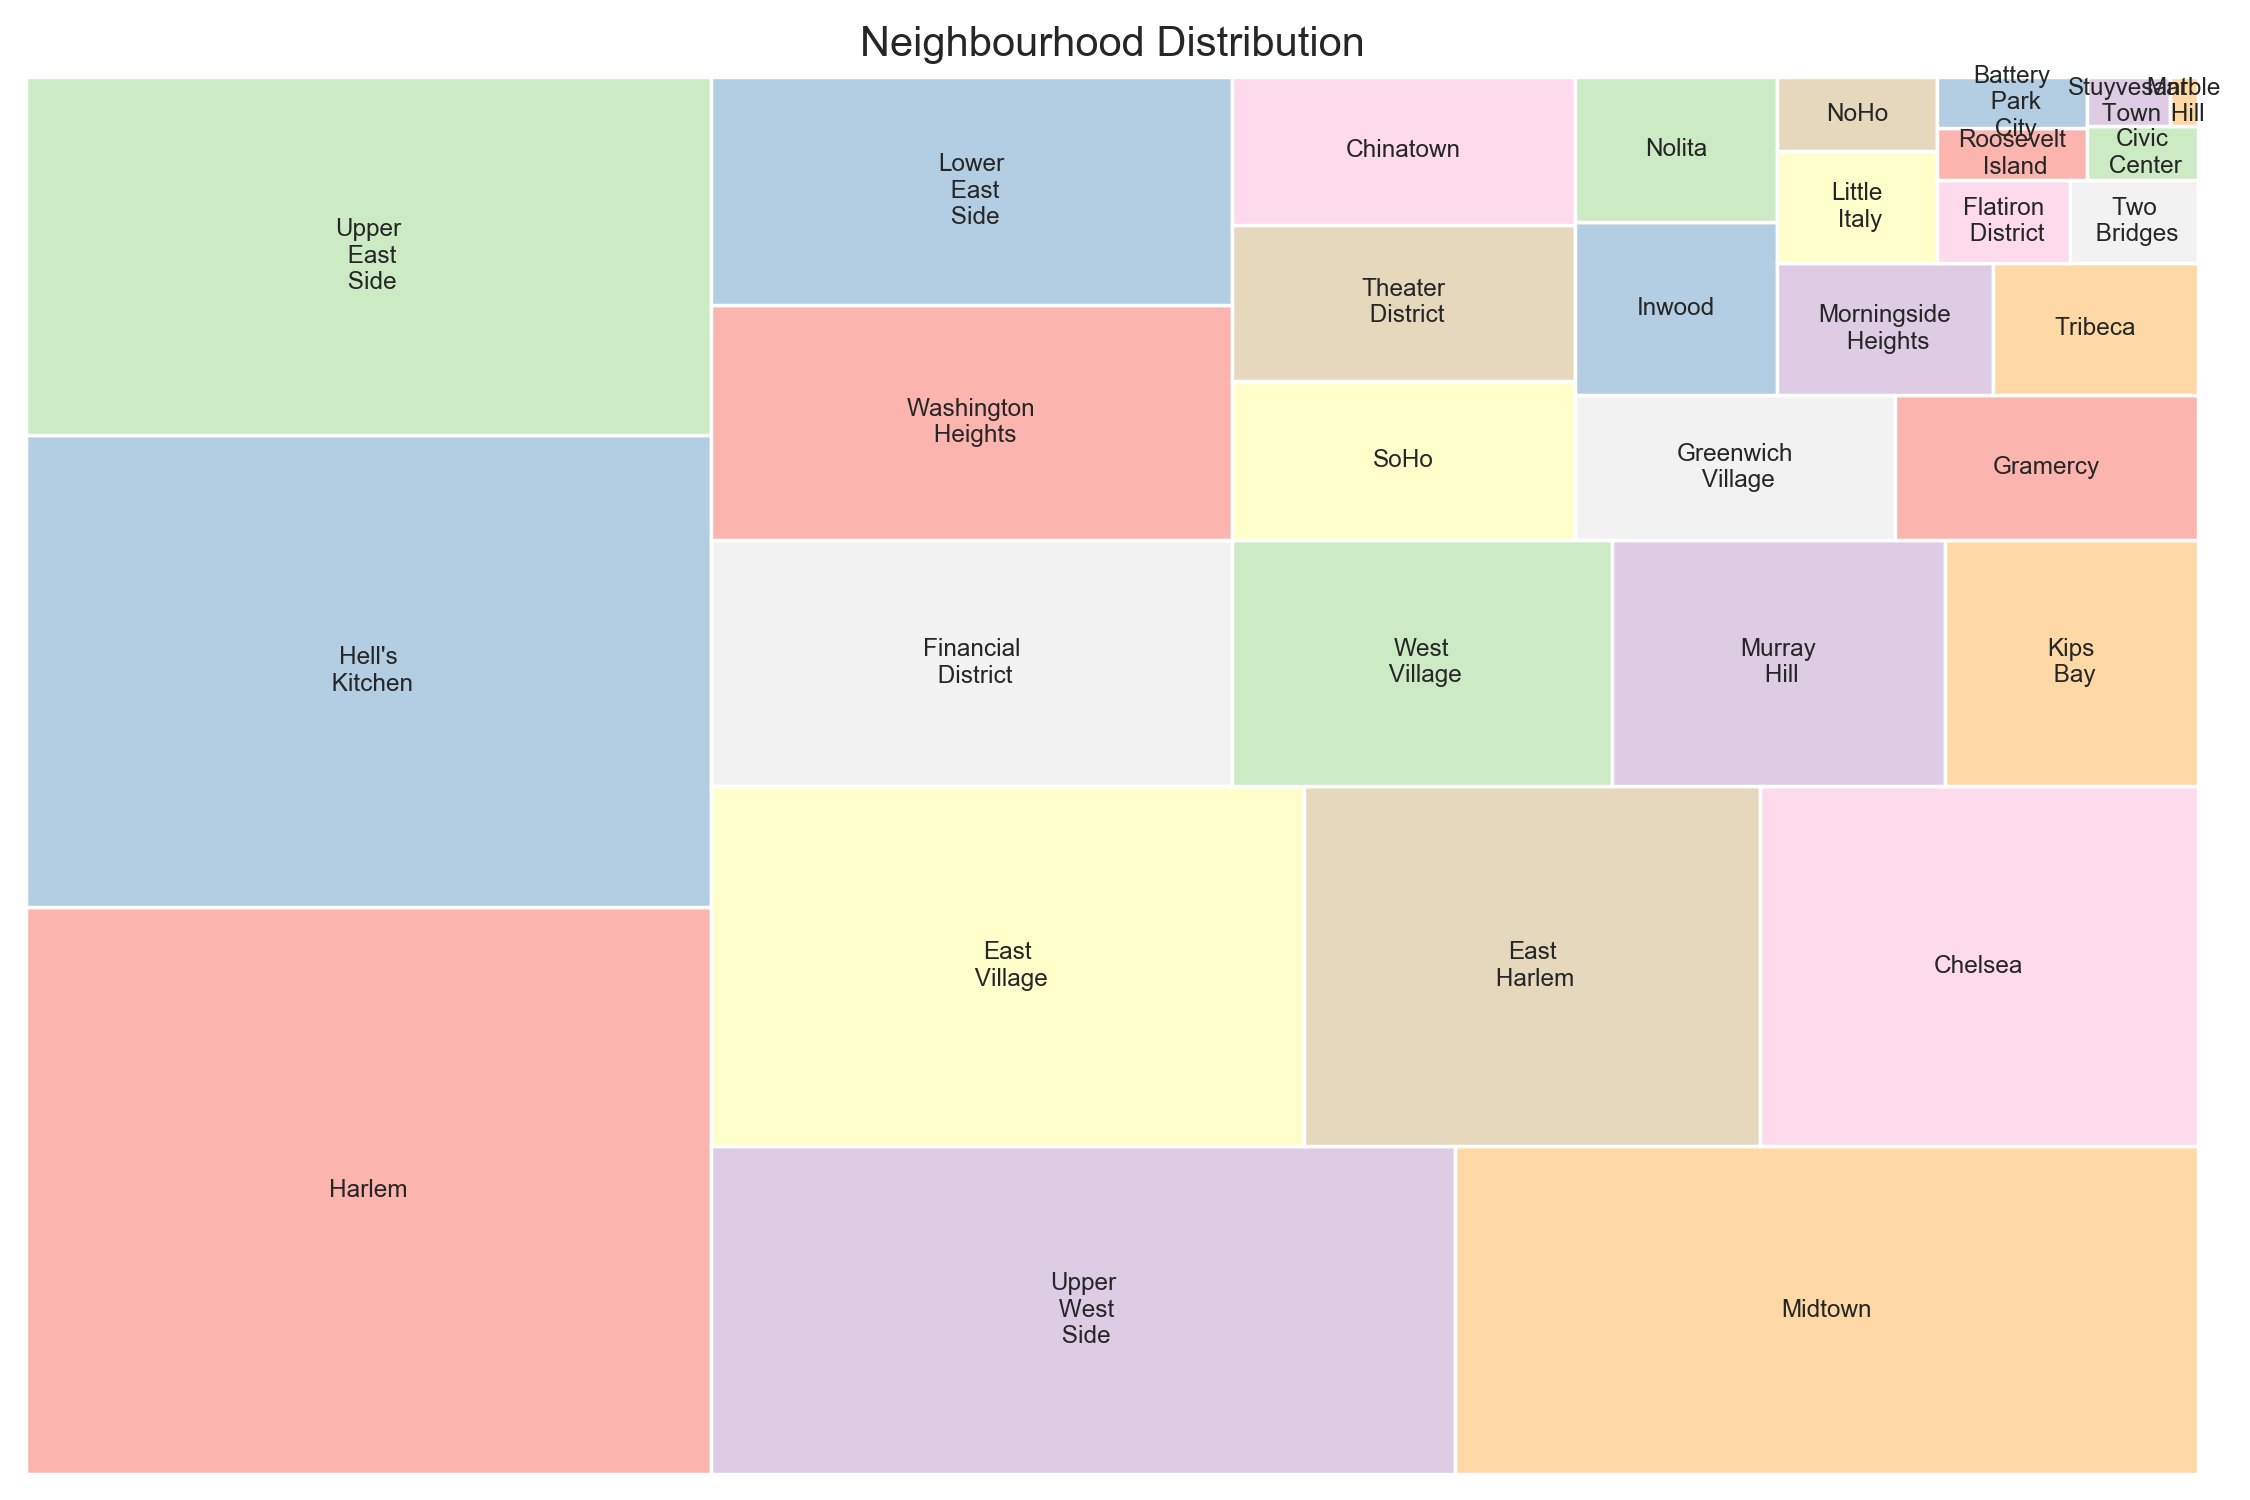

In [6]:
#동네
import squarify
from collections import Counter

volumes = list(data['neighbourhood'].value_counts().values)
labels = list(data['neighbourhood'].value_counts().index)
labels = list(map(lambda i: i.replace(' ','\n '), labels)) #make newline, not necessary

plt.figure(figsize=(9,6))
squarify.plot(sizes=volumes, label=labels, color=sns.color_palette('Pastel1'))
plt.rc('font', size=7)
plt.title('Neighbourhood Distribution', size=12)
plt.axis('off')
plt.tight_layout()

그 다음은 **리뷰 개수, 최소 숙박 날짜**에 대한 분포입니다. 일단 두 분포 모두 매우 치우쳐(skewed)있네요! 대부분의 값이 특정 값에 몰려있는데, 극심한 아웃라이어들이 존재하고 있는 것을 확인할 수 있습니다. 리뷰 개수는 최대 600개까지도 있고, 최소 숙박날짜는 1200일까지도 있네요. 리뷰 개수야 그렇다 치지만, 최소 숙박날짜가 무슨 1000일이 넘을까요? 에어비앤비는 거의 여행 목적으로 이용한다고 생각했는데, 비즈니스라던지 다른 목적으로 몇개월, 몇년 씩 머물러야 하는 경우에도 에어비앤비를 이용하는 것 같습니다.

<IPython.core.display.Javascript object>


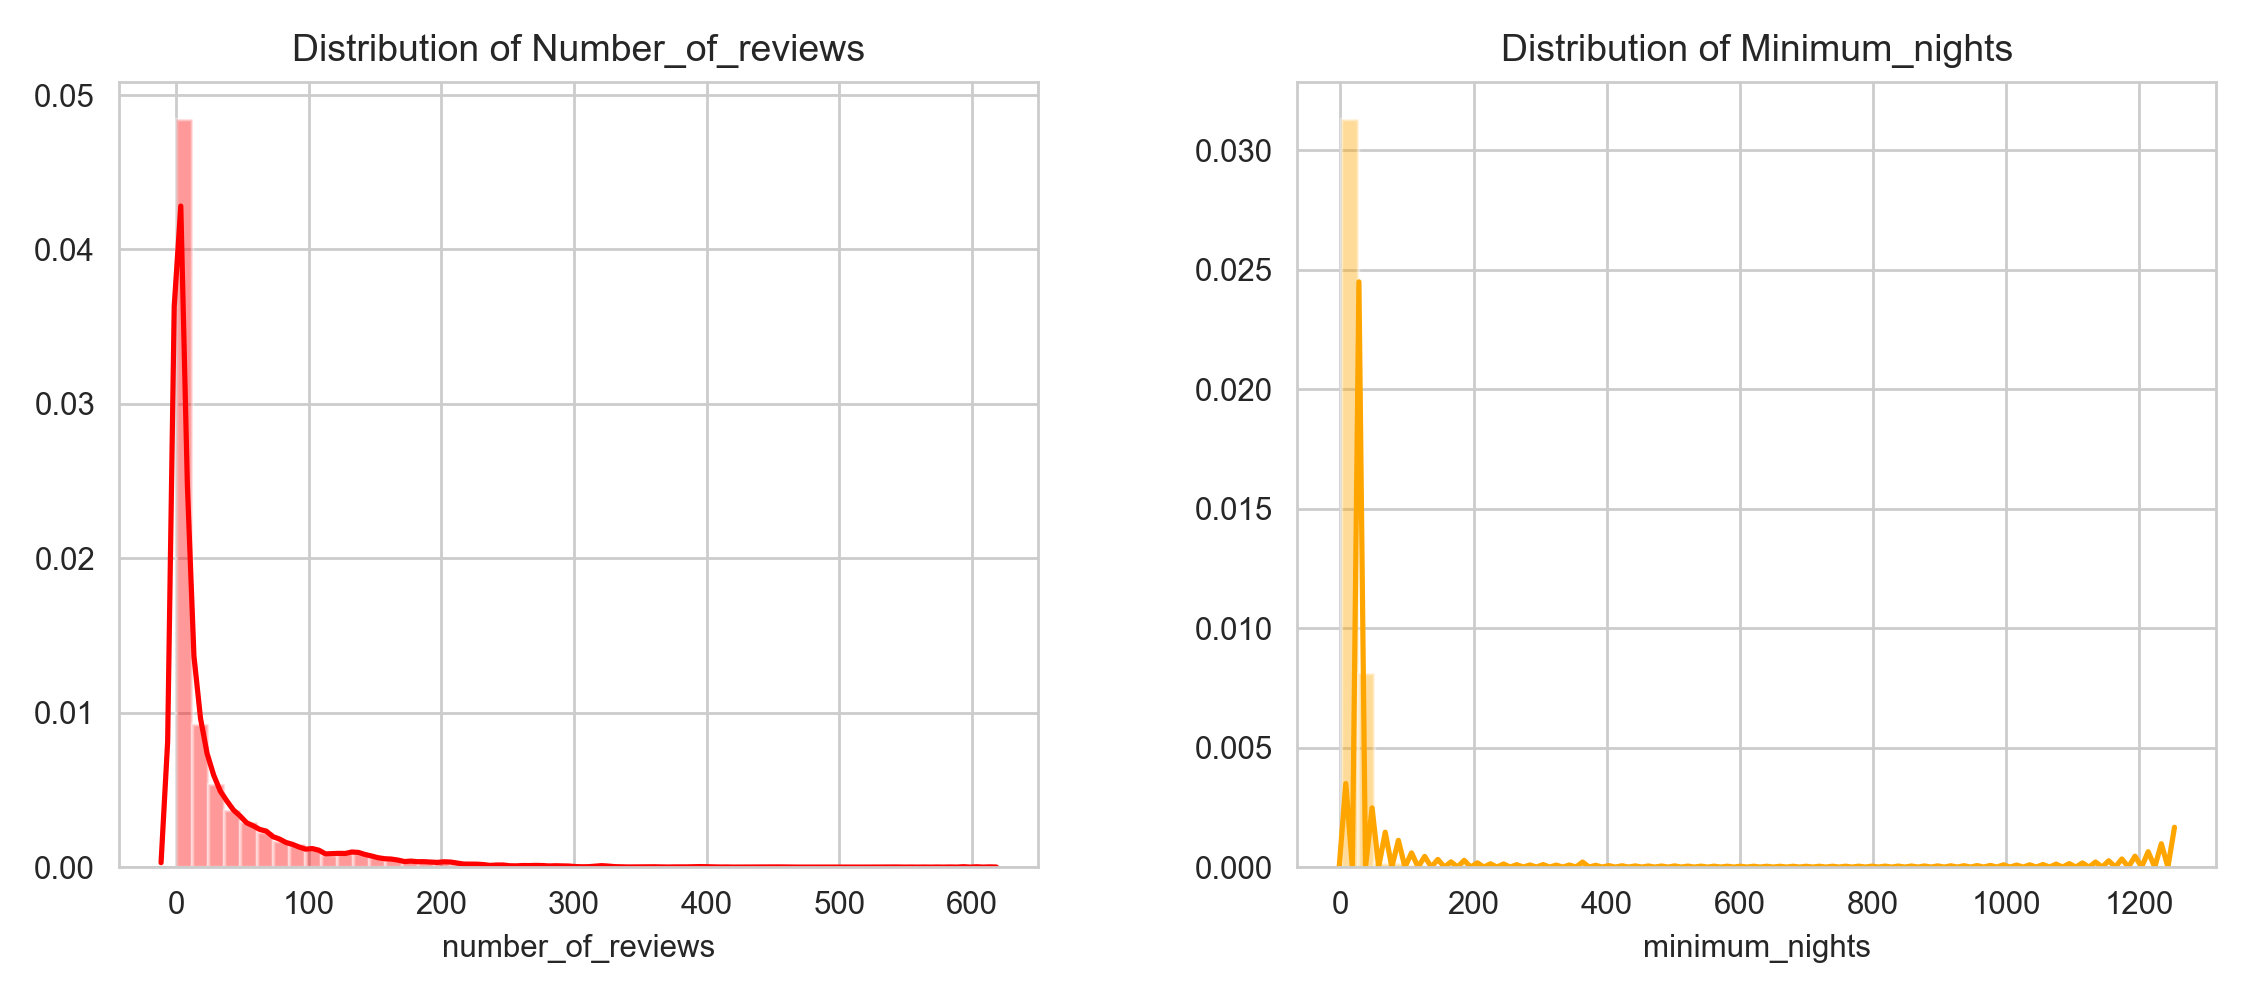

In [8]:
#리뷰 수
fig,ax=plt.subplots(1,2,figsize=(9,4))
sns.distplot(data.number_of_reviews, color='red', ax=ax[0])
ax[0].set_title('Distribution of Number_of_reviews')

#최소 숙박 날짜
sns.distplot(data.minimum_nights, color='orange', ax=ax[1])
ax[1].set_title('Distribution of Minimum_nights')

plt.tight_layout(w_pad=5)

이제 주요 변수들을 한번 스캔 완료했습니다! 그러면 이제 첫번째 궁금증을 해결해봅시다.

<br>

## 2. 맨하탄에서 동네별로 하루 숙박비가 어떻게 다를까?

여행객들에게는 숙소 정할 때 위치가 가장 중요한 요소 중 하나일 것입니다. 때문에 당연히 지역에 따라 그 가격이 차이가 많이 날거라고 생각을 했는데요. 어떤 지역이 가격이 비싼 편이고, 어떤 지역이 저렴한 편인지 알아봅시다. 그 전에, 아까 봤던 가격 분포를 조금 더 잘 보기 위해서, 케이스를 조금 나누려고 합니다. 일단 일반 여행객들이 지불할 용의가 있는 가격의 상한을 100달러(100달러도 비싸다고 생각하지만ㅜ_ㅜ)로 정하고, 100달러 이하를 **price:low**라고 하겠습니다. 그 다음, 100달러부터 700달러까지를 비싼 가격 **price:high**라고 하고, 700달러 이상을 어나더레벨, **price:too high**라고 해보고 분포를 다시 보겠습니다!

In [9]:
def price(x):
    if x<100:
        return 'price:low'
    elif x>=100 and x<700:
        return 'price:high'
    else:
        return 'price:too high'
    
data['price_stage'] = data['price'].apply(price)

<IPython.core.display.Javascript object>


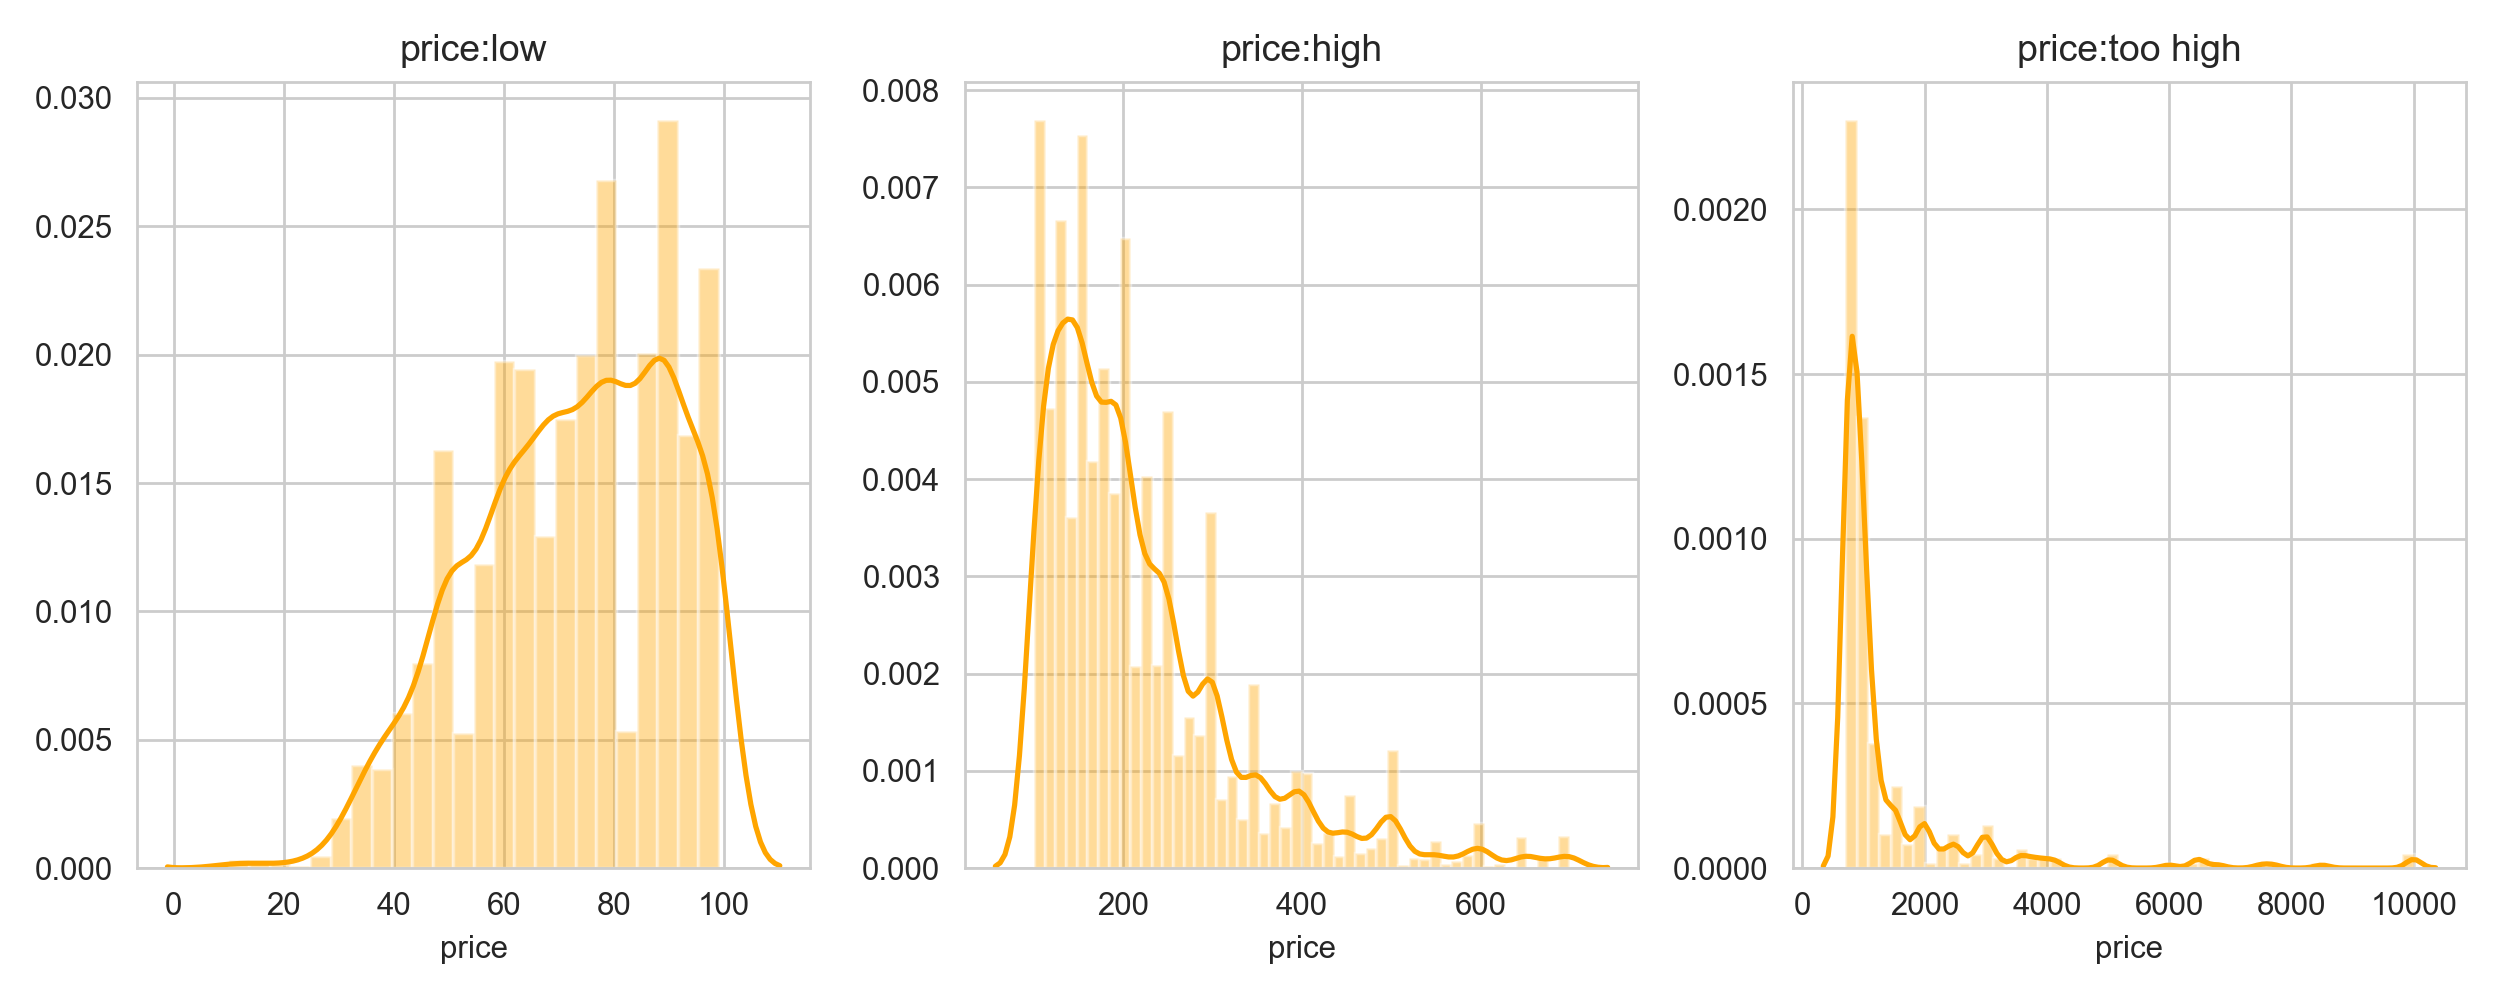

In [10]:
fig,ax=plt.subplots(1,3,figsize=(10,4))

for i,stage in enumerate(['price:low','price:high','price:too high']):
    temp = data[data.price_stage==stage]
    sns.distplot(temp.price, color='orange', ax=ax[i])
    ax[i].set_title(stage)

plt.tight_layout()

이제 지역별로 이 가격 단계 분포가 어떻게 되는지 알아봅시다. 

In [11]:
temp_price = data[['neighbourhood','price_stage']].copy()
temp_price_tab = pd.crosstab(temp_price.neighbourhood, temp_price.price_stage)
temp_price_tab['total'] = temp_price_tab.sum(axis=1)
temp_price_tab = temp_price_tab.sort_values(by='total')

<IPython.core.display.Javascript object>


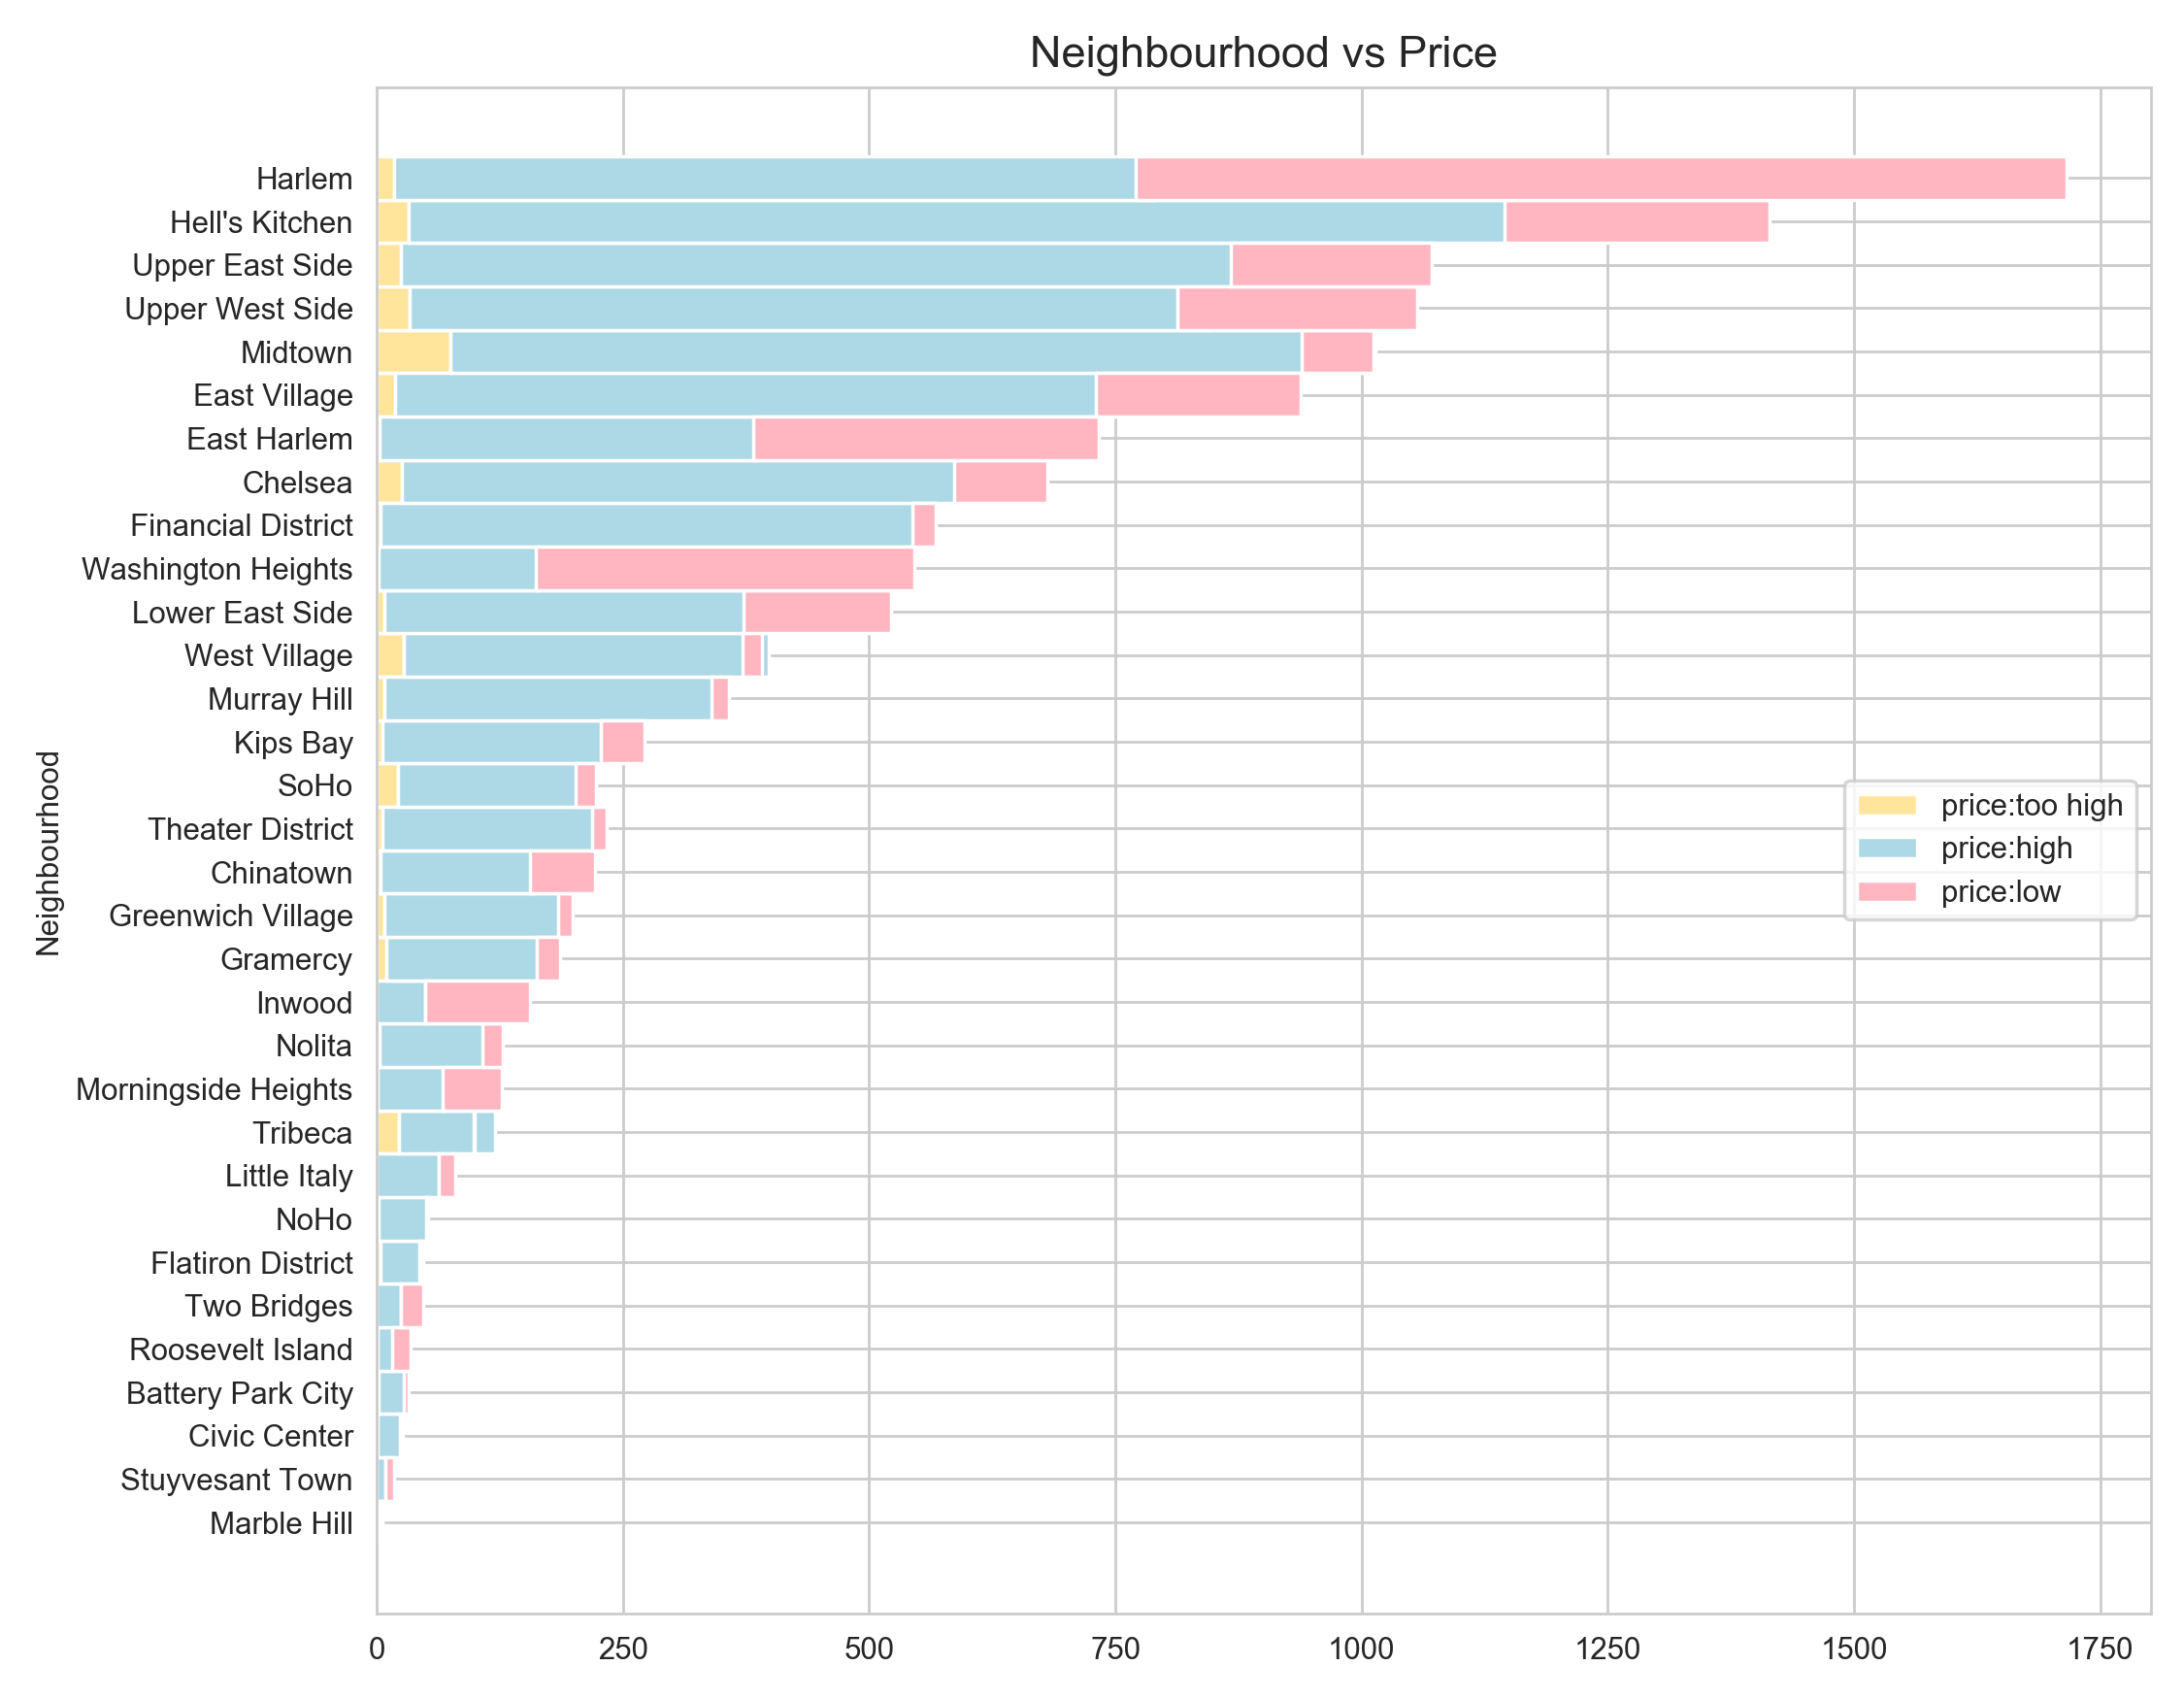

In [14]:
labels = temp_price_tab.index
too_high = temp_price_tab['price:too high']
high = temp_price_tab['price:high']
low = temp_price_tab['price:low']
width = 1 

fig, ax = plt.subplots(figsize=(9,7))
ax.barh(labels, too_high, width, label='price:too high', color='#ffe49b')
ax.barh(labels, high, width, left=too_high, label='price:high', color='lightblue')
ax.barh(labels, low, width, left=high, label='price:low', color='lightpink')

ax.set_ylabel('Neighbourhood')
ax.set_title('Neighbourhood vs Price', size=13)
ax.legend(loc='right')
plt.tight_layout()

위 그래프를 보면, 할렘이 맨하탄에서 에어비앤비 숙소가 가장 많고, 가격이 낮은 숙소의 개수도 가장 많은 것을 눈으로 확인할 수 있습니다. 한편, 여행객들에게 인기가 많고 맨하탄의 중심 위치인 미드타운은, 역시나 황금 위치인만큼 가격이 낮은 숙소의 비율이 적고, 가격이 높은 숙소의 비율이 높은 것을 확인할 수 있습니다. **price:too high**의 전체 개수가 많은 편이 아닌데, 그 중에서는 미드타운이 가장 많은 것을 볼 수 있습니다.  

<br>

## 3. 맨하탄에서 가장 많은 집을 가지고 있는 호스트는 누굴까?

에어비앤비를 보다보면, 많은 호스트들이 집을 여러개 가지고 있는 것을 볼 수 있는데요. 사람도 많고, 관광객도 많고, 집값도, 물가도 비싼, 바로 그 뉴욕에서!! 에어비앤비를 여러개 소유하고 있다니 정말 부럽습니다........ 아무튼간에, 그렇다면 맨하탄에서 가장 많은 에어비앤비를 보유하고 있는 호스트는 누구일까요?  그 전에, 단순히 에어비앤비 개수가 많은 것보다 그래도 리뷰가 10개 이상은 되는 것으로 필터링하고자 합니다. 다시 말해서, 리뷰가 10개 이상으로, 어느정도 사람들이 이용하고 있는 에어비앤비를 가장 많이 보유하고 있는 호스트를 찾아보겠습니다! 

In [16]:
temp_host = data[data.number_of_reviews>10].sort_values(by='calculated_host_listings_count').tail(150)
temp_host2 = temp_host.drop_duplicates('host_id')

<IPython.core.display.Javascript object>


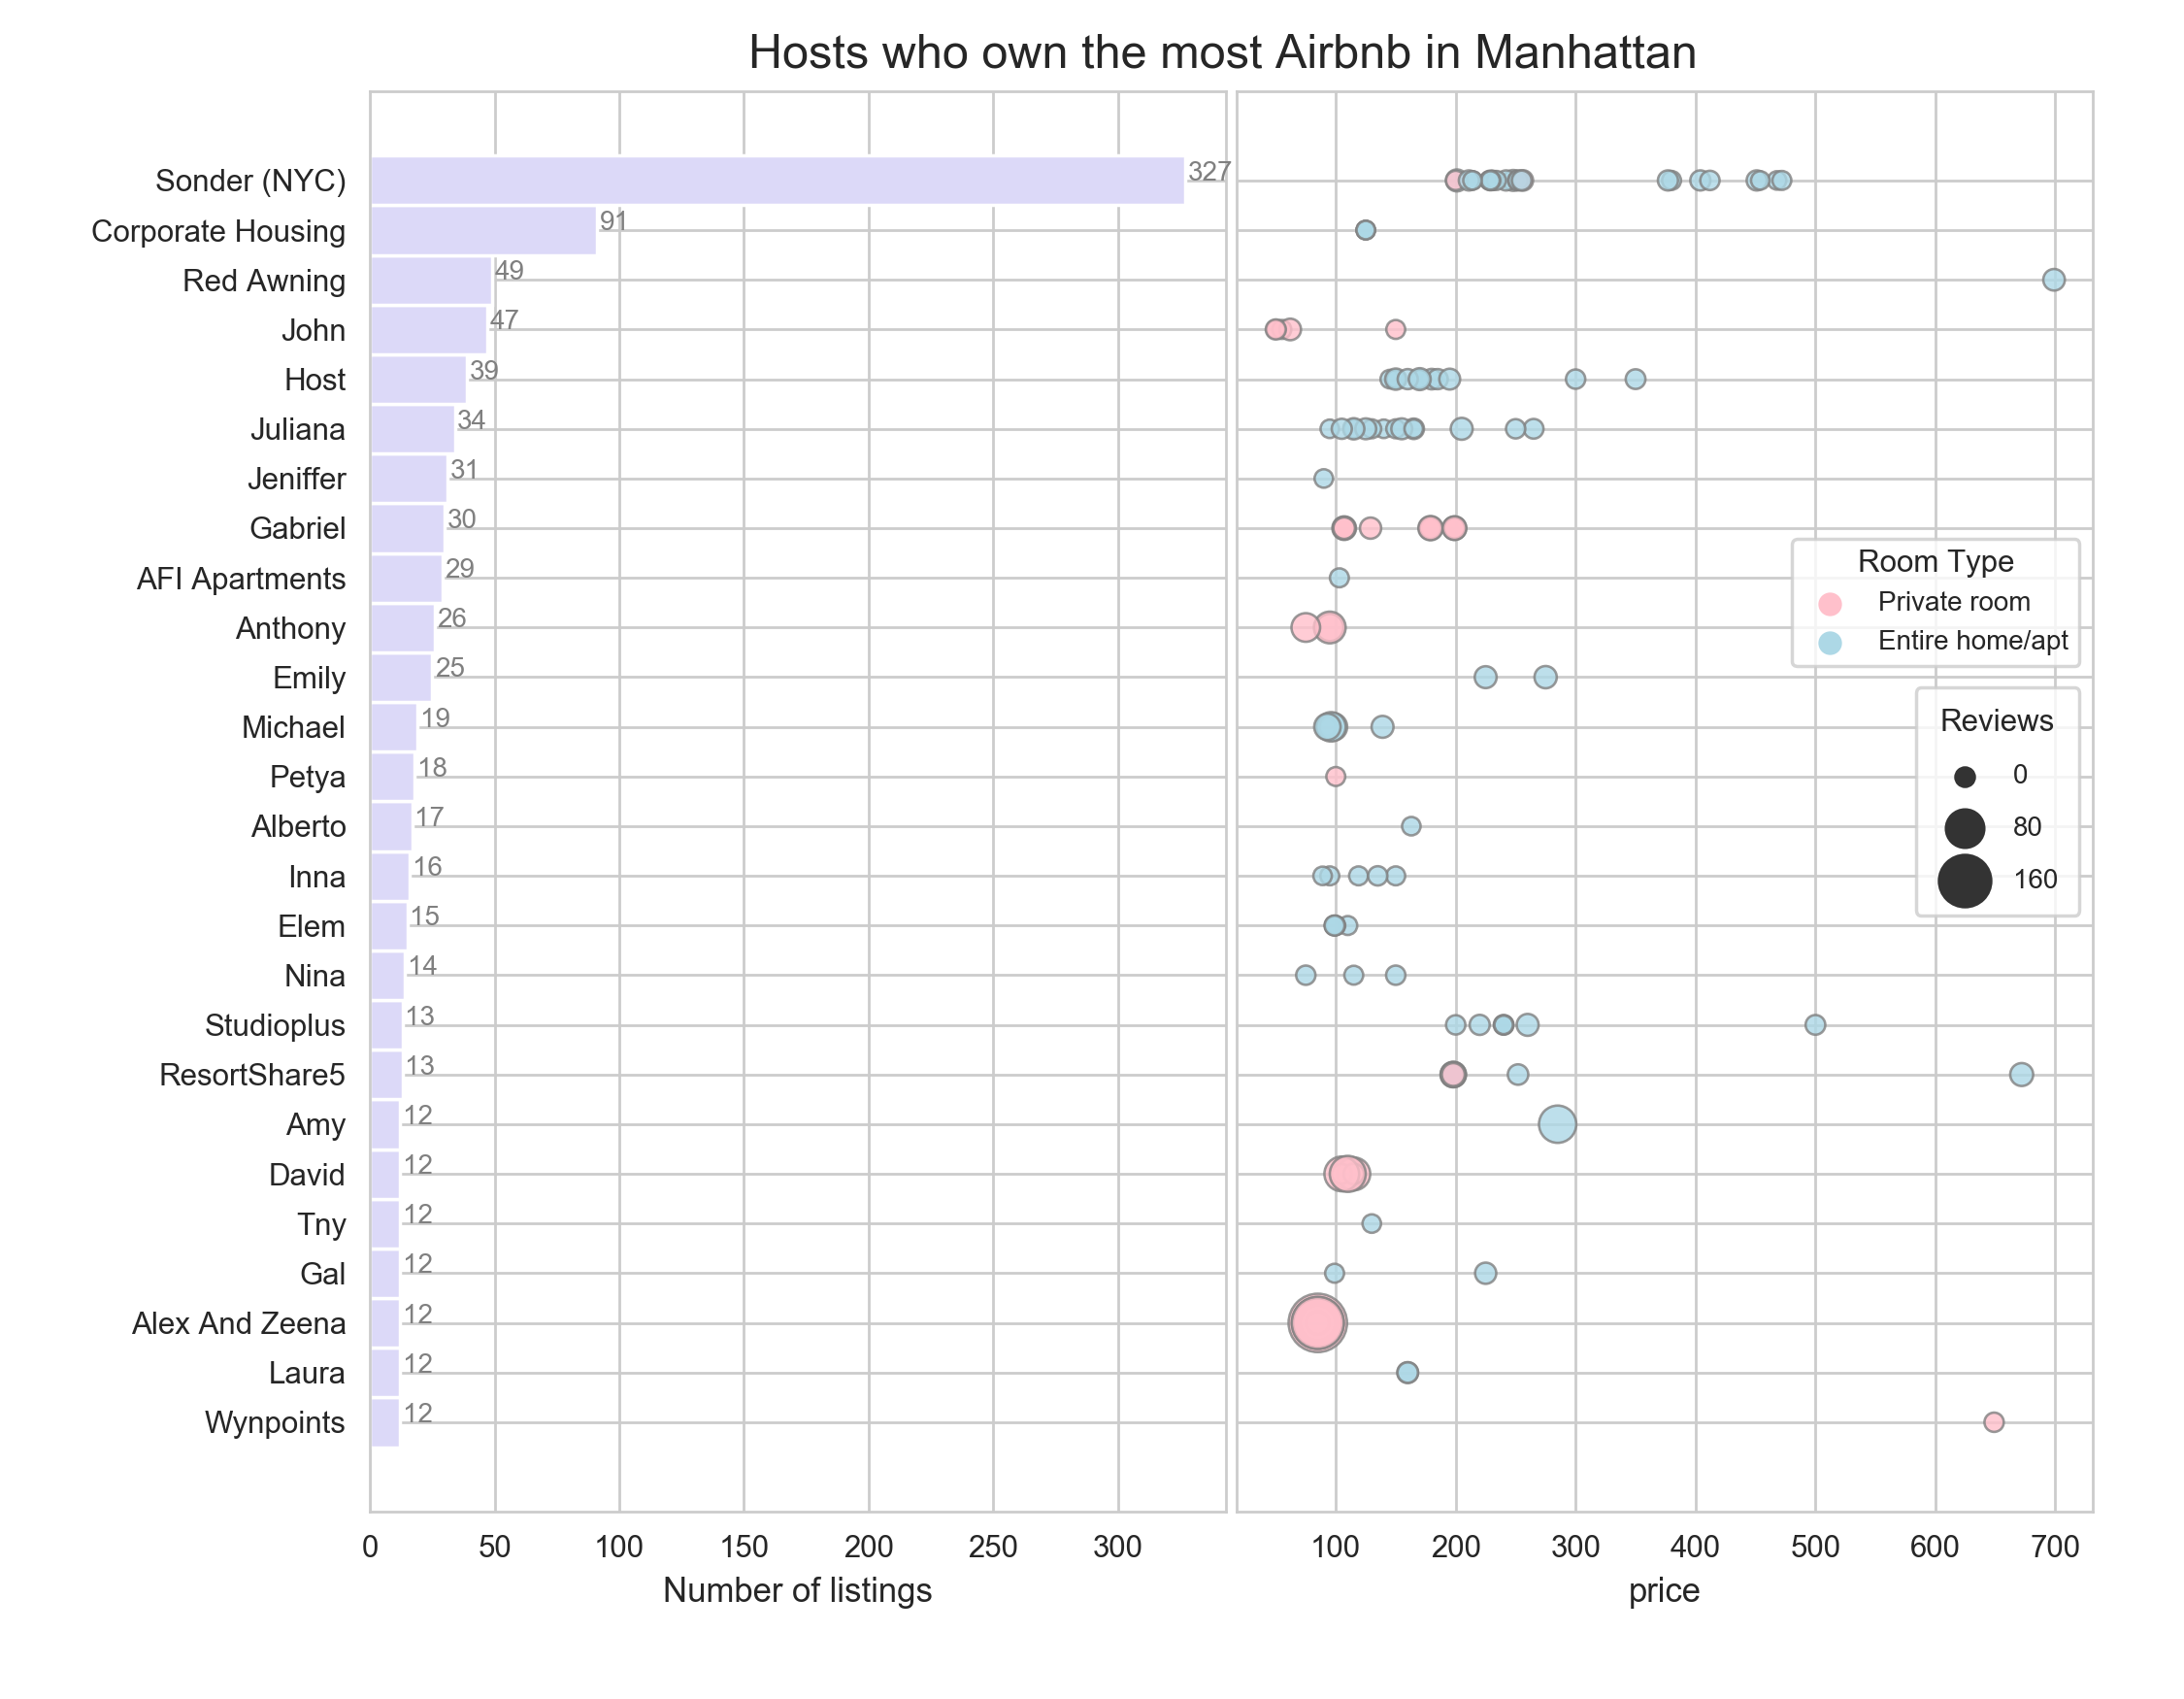

In [17]:
fig,ax=plt.subplots(1,2,figsize=(9,7),sharey=True)
fig.suptitle('Hosts who own the most Airbnb in Manhattan', x=0.56, size=14)

#### sub1
listing = temp_host2.calculated_host_listings_count
host = temp_host2.host_name

ax[0].barh(host, listing, 1, color='#dcd9f8')
for i, num in zip(host, listing): 
    ax[0].text(num+1, i, "{}".format(int(num)), fontsize=8, color='gray') #annotation
ax[0].set_xlabel('Number of listings', size=10)


#### sub2
color = {'Private room':'pink', 'Entire home/apt':'lightblue', 'Shared room':'#ffe49b'}
sns.scatterplot(x='price', y='host_name', hue='room_type', palette=color, edgecolor='gray', alpha=0.8,
                size='number_of_reviews', sizes=(30, 300), data=temp_host, ax=ax[1])
ax[1].set_xlabel('price', size=10)

#legend upgrade
handles, labels = ax[1].get_legend_handles_labels()
legend1 = ax[1].legend(handles[1:3], labels[1:3], title='Room Type',fontsize=8, loc="right", bbox_to_anchor=(1, 0.64))
ax[1].add_artist(legend1)
ax[1].legend(handles[4:-1], labels[4:-1], fontsize=8, title='Reviews', loc="right", labelspacing=1, borderpad=0.8)

plt.tight_layout(pad=3,w_pad=0)

위 그래프를 보니 맨하탄에서 독보적으로 많은 에어비앤비 숙소를 가지고 있는 호스트는 **Sonder, Corporate Housing**입니다! **Sonder**는 검색해보니 세계 각지에 숙소가 있는 것을 보니 숙박업체인 것 같아요! 한편, ``원의 크기는 해당 숙소의 리뷰 수를 반영``합니다. 위 호스트 중에서 리뷰 수가 가장 많은 에어비앤비를 보유한 호스트는 **Alex and Zeena**이네요. 리뷰가 좋은 내용인지 아닌지는 알 수 없지만, 에어비앤비의 경우 리뷰가 많다는 것은 아무래도 많은 사람들이 긍정적인 리뷰를 쓰고, 그만큼 많은 사람들이 믿고 묵었다는 것을 의미할 가능성이 높을 것 같습니다! 그렇다면 리뷰 개수에 대한 변수도 꽤 중요한 정보를 제공할 것 같아요. 평균 리뷰 수가 가장 많은 집은 대체 어떤 집인지 알아봅시다! 

<br>

## 4. 리뷰가 가장 많은 에어비앤비는 어떤 집일까? 

리뷰가 많은 에어비앤비는 어떤 곳일까요? 가격이 저렴한 곳일 수도 있을 것이고, 위치가 매우 좋은 곳일 수도 있을 것입니다. 저는 에어비앤비 고를 때 리뷰를 또 중요하게 보기 때문에, 맨하탄에서 리뷰 수가 가장 많은 에어비앤비는 어떤 곳인지 정말로 궁금합니다! 먼저 가격이 많이 중요한지 알아보기 위해, 일단 리뷰 수가 많은 순서대로 상위 200개만을 뽑아서, 리뷰 수와 가격, 그리고 방구조를 비교해보도록 하겠습니다! 

<IPython.core.display.Javascript object>


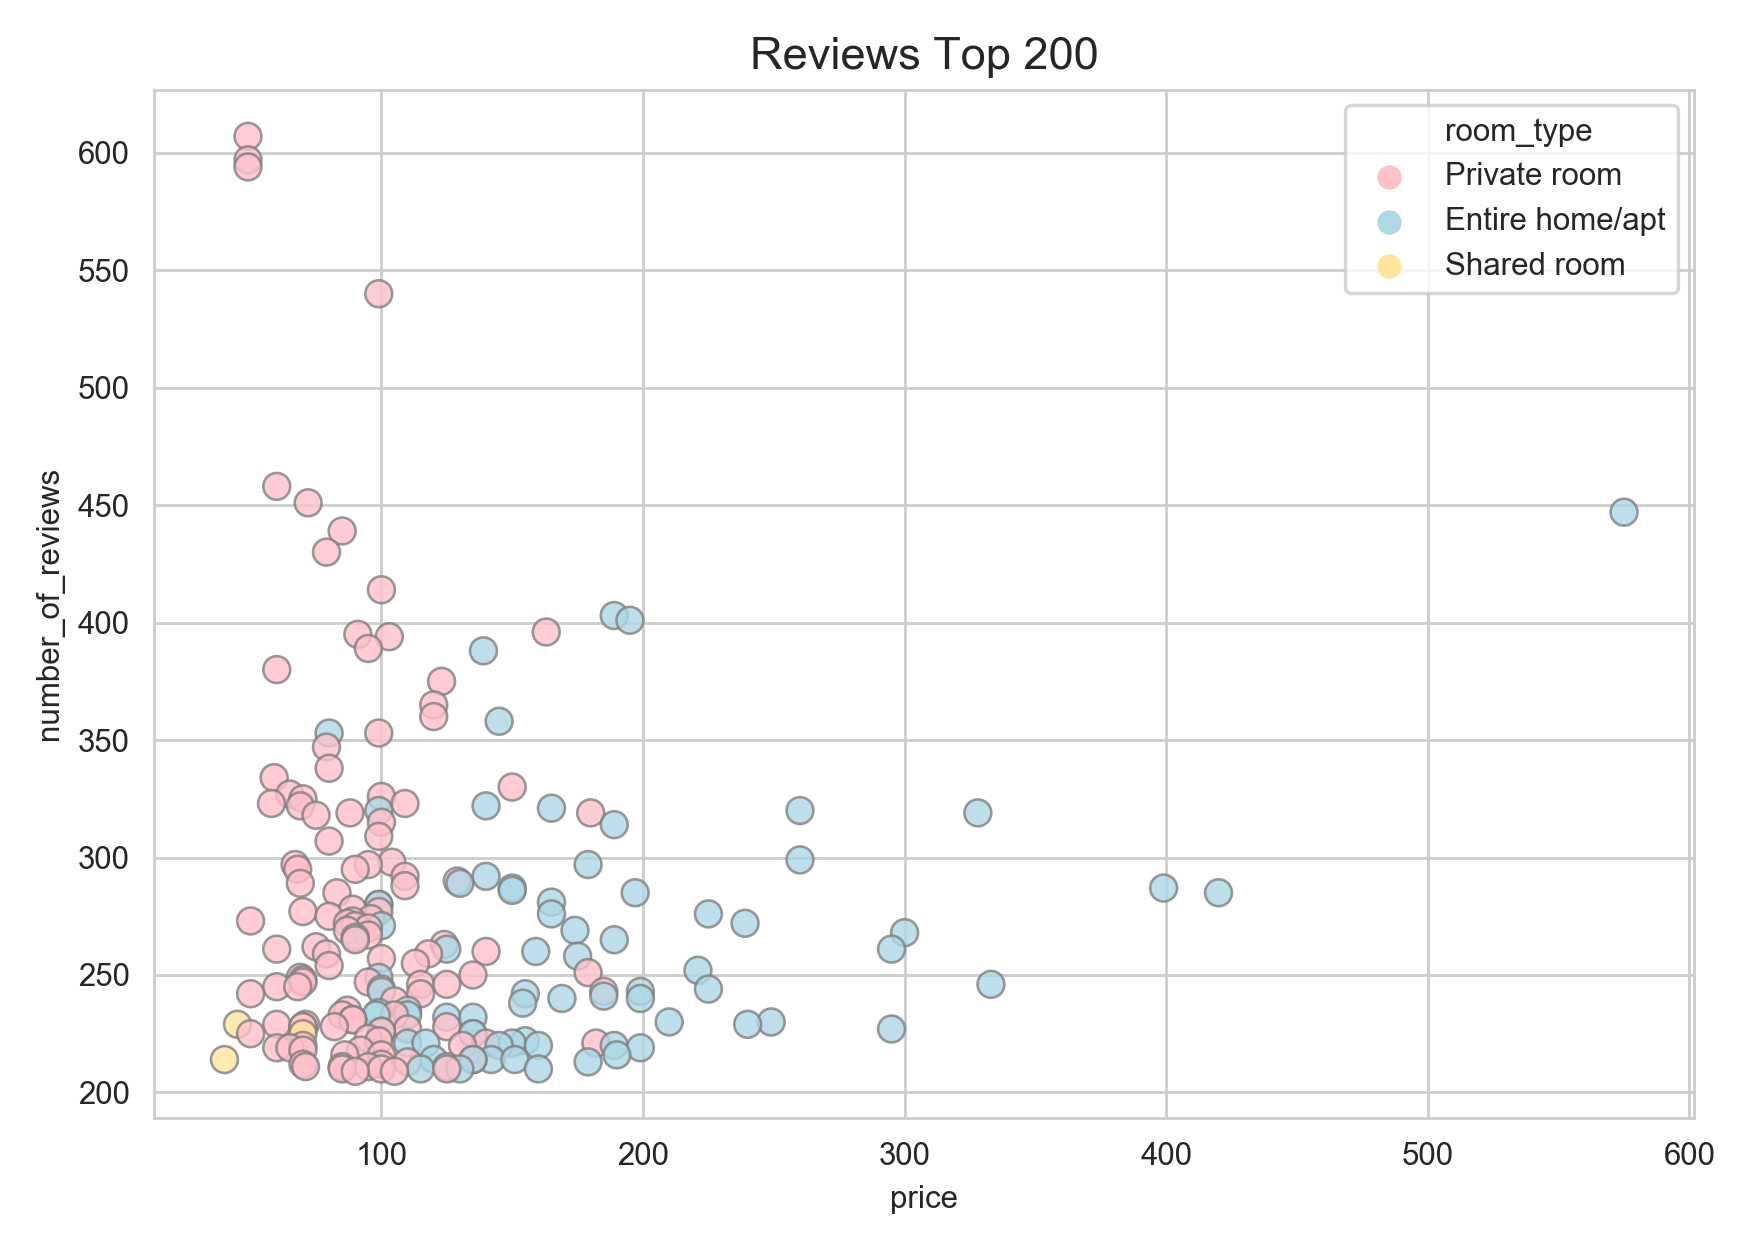

In [18]:
temp_review = data.sort_values(by='number_of_reviews',ascending=False).head(200)

fig,ax = plt.subplots(figsize=(7,5))
ax = sns.scatterplot('price', 'number_of_reviews', palette=color, hue='room_type', edgecolor='gray', s=60, alpha=0.8, data=temp_review)
ax.set_title('Reviews Top 200', size=13)
plt.tight_layout()

리뷰가 600개가 넘는, 즉 리뷰수가 가장 많은 에어비앤비는 가격이 약 50달러도 안되는 것으로 보아 매우 저렴한 것 같긴 합니다. 맨하탄의 에어비앤비 가격대가 전반적으로 높은 상황에서, 리뷰 상위 200개 에어비앤비의 가격대가 100달러쯤에 몰려 있고, 200달러보다는 대부분 아래에 존재하는 것을 볼 때, 확실히 가격이 리뷰 수에 영향을 미치는 것은 맞는 것 같습니다. 그런데 600달러에 육박하는데도 리뷰 수가 매우 많은 집도 하나 있네요! 이 집은 가격대가 있는 대신, 다른 엄청난 장점이 있나 봅니다. 한편, 방 구조는 Private room이 Entire home보다 조금 더 비율이 많은 것을 확인할 수 있습니다! 원래 앞에서 전체 분포로는 Entire home이 60%였는데, 리뷰가 많은 상위 200개 에어비앤비는 Private room이 과반수를 차지합니다. 공급은 Entire home이 많은 것에 비해, 수요는 Private room이 더 많다고 볼 수 있지 않을까 싶습니다. 이제 위치를 확인해보겠습니다!

In [19]:
import folium

m = folium.Map(location=[40.776982, -73.971294], zoom_start=13)

for lat, lon, name, review, price in zip(temp_review.latitude, temp_review.longitude, temp_review.name, temp_review.number_of_reviews, temp_review.price):
    text = '<b>1.name:</b> '+ name + '<br><b>2.review:</b>' + str(review) + '<br><b>3.price:</b>'+ str(price) + '$'
    marker = folium.Marker(location=[lat,lon], popup=folium.Popup(text, max_width='150'))
    m.add_child(marker)

m

위치는 맨하탄 지역 골고루에 퍼져있는 것을 보니, 맨하탄 전역의 에어비앤비를 많이들 이용하는 것 같습니다..! 물론 Lower Manhattan 쪽 **East Village** 동네에 좌표 무리가 있는 것 같지만, 다른 동네들도 적지 않은 것 같습니다. 확실히 뉴욕이 지하철이 잘 되어 있고, 도로명이 길 찾기 편하게 되어 있어서 그런지, 사람들이 많이 이용하는 에어비앤비가 막 특정 동네에 몰려 있는 정도는 아닌 것 같아요. 저는 위치가 굉장히 중요할 거라 생각했는데, 위치는 충분히 교통수단으로 커버가 되서 그런지, 가격과 같은 다른 조건들이 상대적으로 더 중요해진 게 아닌가 싶네요! 물론 위치가 가격에 미치는 영향이 크지만, 그 가격을 감수하고 다른 조건을 택하는 사람들과 그렇지 않은 사람들로 확연하게 나누어지는 것 같습니다.

아쉽게도 이 데이터는 각 에어비앤비가 어떤 집인지에 대한 정보를 제공하는 변수가 많지는 않은 것 같아요ㅜㅜ 리뷰 수가 많은 집들이 어떤 집인지 좀더 알아보고 싶은데.. 그래서 고민하다가 각 에어비앤비 이름에서 정보를 좀 얻어볼 수 있지 않을까 하는 생각이 들었습니다!! 에어비앤비를 이용해보신 분들을 아시겠지만, 어떤 에어비앤비를 검색할 때 그 에어비앤비 이름은 그 집의 장점들을 마구 드러내고 있습니다! 위치가 좋다면 'Good Location', 집 주변이 조용하다면 'Quiet Place' 등등 많은 정보를 제공하고 있기 때문에, 간단하게 워드 클라우드로 한번 주요 단어들을 찾아보겠습니다. 

<IPython.core.display.Javascript object>


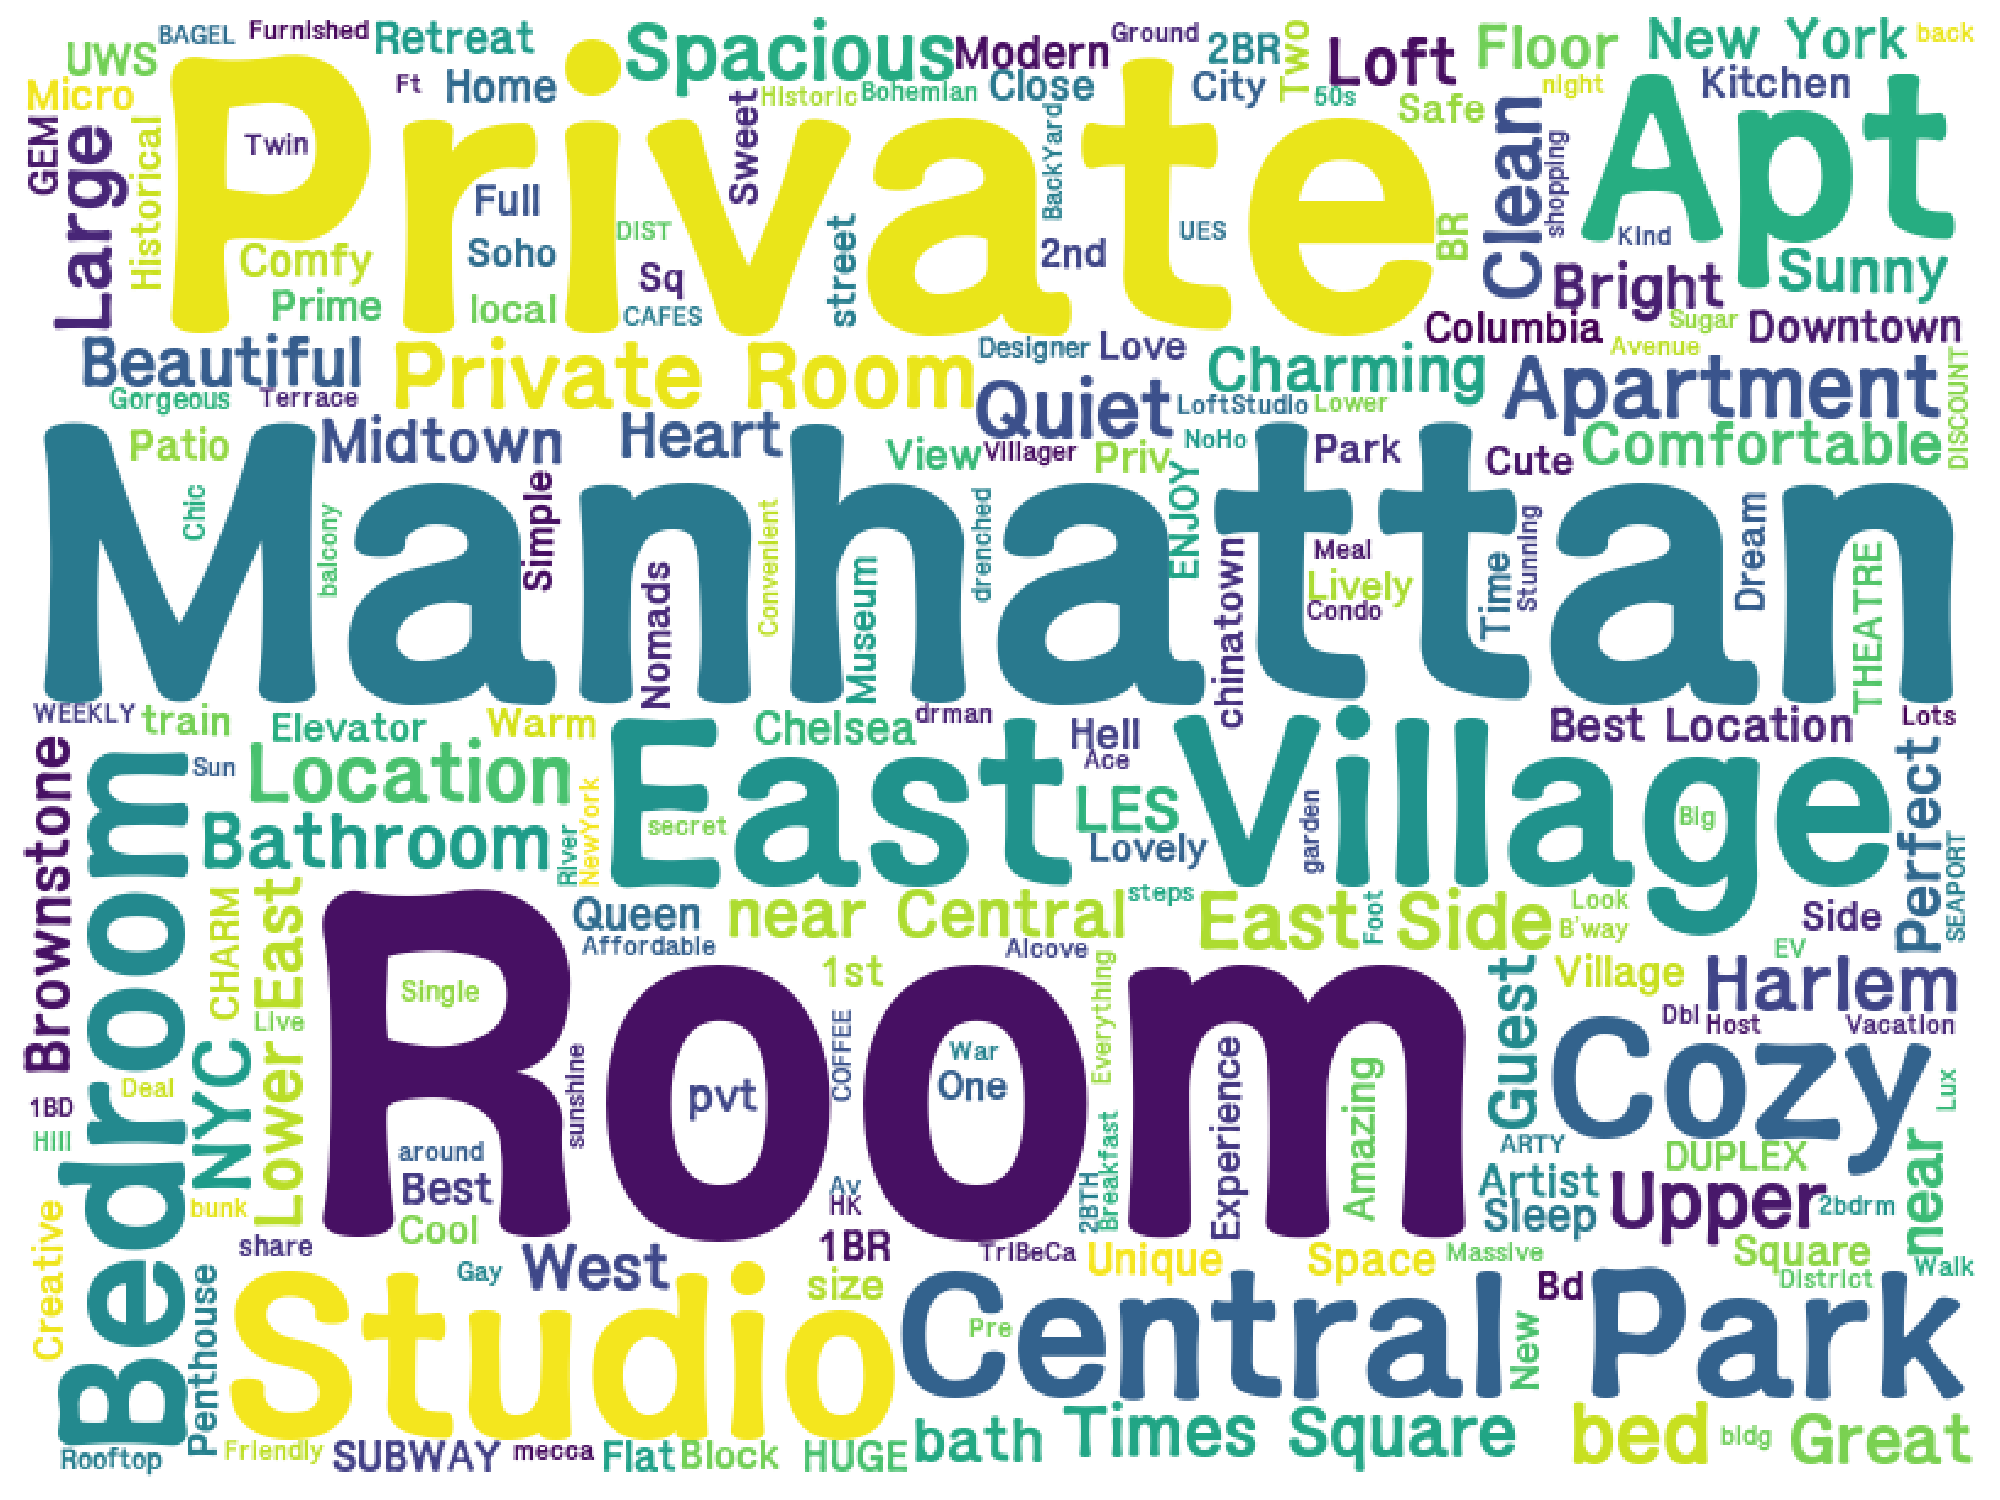

In [20]:
text = list(temp_review.name)
text = " ".join(text)
font_path =   'C:\\Windows\\Fonts\\HMFMOLD.TTF'

from wordcloud import WordCloud
wordcloud = WordCloud(font_path = font_path, background_color='white', relative_scaling=0.2, 
                      width=800, height=600, max_font_size=200, random_state=0).generate(text)

fig = plt.figure(figsize=(8,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0.5)
plt.show()
#fig.savefig('wordcloud1.png')

리뷰가 가장 많은 상위 200개 에어비앤비 숙소 이름들을 워드 클라우드로 나타내 보았습니다! 가장 큰 것은 **Manhattan, Room, Private**이 있네요. 이 단어들은 어느정도 당연한 단어들입니다..! 그런데 그 다음 눈에 띄는 단어중에 **East Village**가 있네요? 아까 지도 상으로도 **East Village**에 리뷰가 많은 집들이 몰려있는 것 같긴 했지만 그 때는 다른 곳이랑 많이는 차이가 안난다고 생각했었거든요? 근데 워드클라우드에 의하면, 리뷰가 많은 에어비앤비 중 굉장히 많은 수가 이름에 **East Village**가 들어가고 있고, 이것은 위치적으로 비교적 **East Village** 동네를 선호하고 있다는 것을 의미할 수 있을 것 같습니다! 그 외에 **Central Park, Times Square** 등 역시 주변 관광명소들을 강조하는 에어비앤비도 상당 수 있구요. 그 다음으로 **Spacious, Cozy, Large, Clean, Quiet** 등 집의 특징을 나타내는 단어들이 많은 것을 확인할 수 있습니다. 이 단어들 중에서는 **Cozy**라는 단어가 가장 큰데, 제가 생각했을 때 **Cozy**는 집이 좁다는 것을 좀 더 장점을 부각해서 언급한 것 같아요ㅋㅋㅋ 보통 집이 넓은데 Cozy하다고 말하진 않았던 것 같아요. 집이 좁으면 아무래도 가격이 조금 더 저렴한 경향이 있을 것이고 그래서 인기가 많은 게 아닐까 싶습니다.

여기까지 맨하탄 에어비앤비에 대해 이모저모 분석해보았습니다! 긴 글 읽으시느라 수고하셨습니다ㅎㅎ